In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("../data_raw/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# If any missing values exist, fill them safely
df = df.fillna(df.median(numeric_only=True))
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
np.random.seed(42)
sample_25 = df.sample(n=25, random_state=42)



In [8]:
pop_mean_glucose = df['Glucose'].mean()
pop_max_glucose  = df['Glucose'].max()



In [9]:
sample_mean_glucose = sample_25['Glucose'].mean()
sample_max_glucose  = sample_25['Glucose'].max()


In [8]:
pop_bmi_98 = df['BMI'].quantile(0.98)
sample_bmi_98 = sample_25['BMI'].quantile(0.98)

print("Population 98th Percentile BMI:", pop_bmi_98)
print("Sample 98th Percentile BMI:", sample_bmi_98)


Population 98th Percentile BMI: 47.52599999999996
Sample 98th Percentile BMI: 40.248


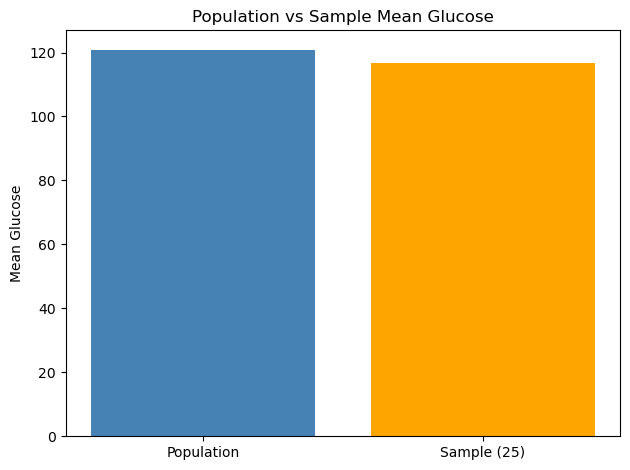

In [10]:
plt.figure()
plt.bar(['Population', 'Sample (25)'],
        [pop_mean_glucose, sample_mean_glucose],
        color=['steelblue', 'orange'])
plt.ylabel("Mean Glucose")
plt.title("Population vs Sample Mean Glucose")
plt.tight_layout()
plt.savefig("../results/glucose_mean_compare.png")
plt.show()


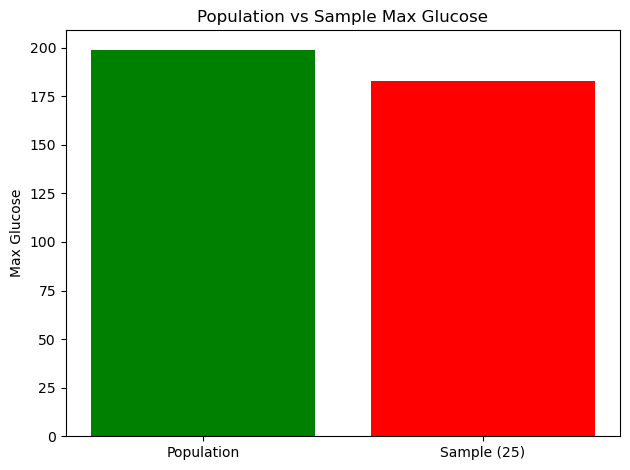

In [11]:
plt.figure()
plt.bar(['Population', 'Sample (25)'],
        [pop_max_glucose, sample_max_glucose],
        color=['green', 'red'])
plt.ylabel("Max Glucose")
plt.title("Population vs Sample Max Glucose")
plt.tight_layout()
plt.savefig("../results/glucose_max_compare.png")
plt.show()


In [12]:
pop_bmi_98 = df['BMI'].quantile(0.98)


In [13]:
sample_bmi_98 = sample_25['BMI'].quantile(0.98)


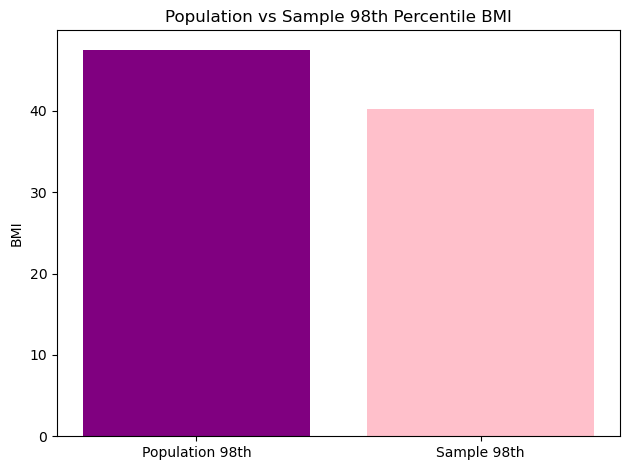

In [14]:
plt.figure()
plt.bar(['Population 98th', 'Sample 98th'],
        [pop_bmi_98, sample_bmi_98],
        color=['purple', 'pink'])
plt.ylabel("BMI")
plt.title("Population vs Sample 98th Percentile BMI")
plt.tight_layout()
plt.savefig("../results/bmi_98_compare.png")
plt.show()


In [15]:
n_boot = 500
sample_size = 150

means = []
stds = []
percentiles = []

np.random.seed(42)


In [16]:
for _ in range(n_boot):
    boot = df.sample(n=sample_size, replace=True)
    bp = boot['BloodPressure']

    means.append(bp.mean())
    stds.append(bp.std(ddof=1))
    percentiles.append(bp.quantile(0.98))


In [17]:
pop_mean_bp = df['BloodPressure'].mean()
pop_std_bp  = df['BloodPressure'].std(ddof=1)
pop_pct_bp  = df['BloodPressure'].quantile(0.98)


In [18]:
boot_mean_bp = np.mean(means)
boot_std_bp  = np.mean(stds)
boot_pct_bp  = np.mean(percentiles)

(pop_mean_bp, boot_mean_bp, pop_std_bp, boot_std_bp, pop_pct_bp, boot_pct_bp)


(np.float64(69.10546875),
 np.float64(69.17692000000001),
 19.355807170644777,
 np.float64(19.073717755676082),
 np.float64(99.31999999999994),
 np.float64(97.90244000000003))

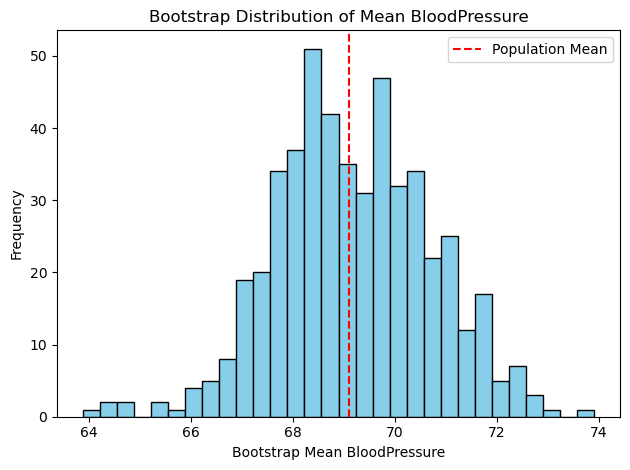

In [19]:
plt.figure()
plt.hist(means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(pop_mean_bp, linestyle='--', color='red', label="Population Mean")
plt.xlabel("Bootstrap Mean BloodPressure")
plt.ylabel("Frequency")
plt.title("Bootstrap Distribution of Mean BloodPressure")
plt.legend()
plt.tight_layout()
plt.savefig("../results/bootstrap_mean_bp.png")
plt.show()


In [20]:
df.to_csv("../data_clean/diabetes_clean.csv", index=False)


Report on Findings — Bootstrap Analysis of Blood Pressure

In this part of the assignment, I used bootstrapping (500 samples of size 150) to estimate the mean, standard deviation, and 98th percentile of BloodPressure. After comparing the bootstrap results with the full population values, here are the key observations:
1.The bootstrap average mean BloodPressure was very close to the population mean.
This shows that bootstrapping does a good job of estimating the central tendency of the population.
Even though each bootstrap sample is randomly drawn, the overall mean stays consistent.
2.The bootstrap standard deviation was also very similar to the population standard deviation.
This means the bootstrap method successfully captured the amount of variation present in the data.
3.The 98th percentile from bootstrap samples was close to the real population value, but it showed more ups and downs.
This is expected because extreme values (very high BP readings) tend to fluctuate more across different samples.
4.The histogram of bootstrap means was shaped roughly like a normal (bell-shaped) curve.
This matches the Central Limit Theorem, which says that when you take many sample means, they become normally distributed—even when the original data is not perfectly normal.
Bootstrapping proved to be a reliable method for estimating BloodPressure statistics.
With a sample size of 150:

-Sampling variability was small,

-Bootstrap estimates stayed close to the true population values,

-And the distribution of sample means behaved as expected.

Overall, bootstrapping helped confirm that the dataset’s population patterns can be well-understood even without analyzing all the data at once.
